# Subjective Text Classification

## I. Introduction

### 1.1 Domain-Specific Area 

Punning is a form of wordplay in which a word is used in a way such that it holds multiple meanings simultaneously, phonetic similarities, or syntactic structures to purposefully introduce ambiguity to express (an often humorous) idea (Miller et al., 2017). The detection and "disambiguation" of puns pose significant challenges in natural language processing (NLP) through the inherent importance of context, semantics, and morphological nuance that is often entirely resistent to traditional quantification methods. The task itself of pun detection lies at the crux of of subjective interpretation and semantic disambiguation, making it a valuable and interesting testbed for evaluating models that aim to capture meaning from subjective language. 

This is a fascinating problem space in itself, and because it not only seeks to improve machine interpretation capabilities for practical purposes - notably machine translation and summarization tasks - but to understand humor and the ways humans convey and interpret meaning. Researchers in linguistics, cognitive psychology, and literary studies have long researched humor and wordplay, and more specifically puns, for their unique applications (Monnot, 1982; Culler, 1988; Lagerwerf, 2002; Bell et al., 2011; Bekinschtein et al., 2011; Delabastita, 1997). Machine translation and, more specifically, humor translation has been an area of minimal research until the popularization of machine learning and AI-driven language interpretation research that opened new scopes that overcame many of the percieved limitations that hindered evaluation. Despite the vast improvements made by transformer models in the area of meaning representation/mapping, a 2018 study by Li et al. showcased how machine translation models struggle and often fail to detect puns specifically, leading to loss of meaning and misinterpretation in translated text (Li et al., 2018). Previous pun detection efforts have historically framed the task as a binary classification problem (pun vs. no pun). While some classical methods relying on handcrafted features that capture phonetic and semantic ambiguity have been attempted, modern approaches largely lean toward leveraging deep embeddings - transformers, contextual word embeddings - to disambiguate text (Popova et al., 2023).

As mentioned, puns tend to exploit multiple meanings in language, making them an ideal domain to test a model's ability to handle ambiguous and subtle linguistic phenomena. Applying the results of this task to real-world scenarios like preserving humor and nuance across languages as they are machine translated, automatic curation or generation of headlines to be used by creative industries, and more natural human-computer interactive conversation agents that are capable of recognizing jokes and puns, would both practically improve the scope of these domains and open new spaces for research in adjacent areas (irony detection, sentiment analysis, etc.). By focusing on pun detection, this project provides a comparative lens through which to see how statistical and embedding-based models handle subjective, context-dependent linguistic features.

### 1.2 Objectives

This report aims to compare how effectively traditional statistical models and embedding-based models, two fundamentally different approaches to text classification, detect and interpret the existence of puns in text. This will be a uniquely challenging task due to the inherent ambiguity and subjectivity of puns, but will also offer a stringent test for each model's ability to capture meaning which in turn offers insight into the trade-offs of each model type in handling linguistic ambiguity. 

The performance of both models will be evaluated using standard metrics - accuracy, precision, recall, and F1-Score - on both homographic puns where the same word has multiple meanings (e.g. "The fisherman was hooked"), and heterographic puns that focus on phonetic similarities between words creating ambiguity (e.g. "I told a chemistry joke, but there was no reaction"). Another dimension this project aims to explore is the role of feature engineering and embedding learning. As mentioned, these are approaches grounded in different assumptions and encapsulates the strength that characterises each text classification approach. Logistic regression and handcrafted features geared toward addressing the challenges faced in the past by statistical models, and the SimpleT5 embedding model with task-specific fine-tuning that showcases the strengths of neural representaitons allow for a comprehensive comparison on these bases. 

A topic becoming of more relevance in many related (and unrelated) domains with the popularization of ML in everyday life is interpretability. As Miller (2017), a prominent figure in literature review for this project, defines it, "Interpretability is the degree to which a human can understand the cause of a decision", and, at times, this is just as important as something being correct to the impact of a result (Miller, 2017). It's worth noting the transparency logistic regression provides with its specific feature association, and the black-box nature of models relying on complex neural representaitons. 

The results of this initial experiment will contribute to broader NLP research and linguistic research as a whole by presenting confirmed results for each model on the task of pun detection that inadvertently showcase the things that drive the ability to interpret puns, and subsequently other subjective language applications. More directly we will demonstrate the limitations of statistical models in handling non-linear linguistic phenomena, and showcase how embedding-based models excel at context-dependent tasks. This framework for comparing statistical and embedding-based approaches in subjectivity-oriented text classification tasks can be applied to humor detection, irony detection, and sarcasm recognition in future expansion. 


### 1.3 The Dataset

The dataset selected for this pun detection classification task is the SemEval 2017 Task 7 Dataset which was specifically designed for a shared task on pun detection and interpretation (Miller T. et al., 2017). It's a widely recognized benchmark set in NLP for evaluating systems on their ability to handle linguistic ambiguity and wordplay, and is grounded on a problem-space specification paper published by the Ubiquious Knowledge Processing Lab and Ontological Semantic Technology Lab included with the dataset (Miller T. et al., 2017). It was the most referenced piece in the literature review conducted in exploration of the problem, and has founded many subtask attempts similar to this one that focus on various areas and niches within pun-detection. 

The paper and dataset were released as part of the SemEval 2017 workshop, a competitive evaluaiton forum for semantic analysis systems(Miller T. et al., 2017). The dataset, gold labels, and scoring system are made publicly available on the official website (Miller T. et al., 2017). 

The dataset is structured to support three subtasks, per their README also included...
1. Subtask 1: Pun Detection - binary classification of sentences as pun or no pun.
2. Subtask 2: Pun Location - identifying exact word or phrase responsible for the pun.
3. Subtask 3: Pun Interpretation - referencing back to synset word tags to disambiguate meanings. 

To fit the constraints and scope of this project, this review will focus exclusively on data from Subtask 1, while attempting to create an infrastructure to accomodate future expansion into including the other two subtasks in the analysis.

The set is organized into test and trial subfolders, each containing an XML set of each type of pun - homo and heterographic - for each subtask, and a corresponding .gold file that references each record with a manual labeled binary classification (in the case of Subtask 1). 

In [1]:
import pandas as pd 
import xml.etree.ElementTree as et
from sklearn.model_selection import train_test_split

`pandas` is the main data processing and modeling tool for this task

`xml` to parse the contents of the xml formed datasets

`sklearn.model_selection` for the train test split methods that allow for consistent and even parsing of data

In [2]:
def parse_xml(xml_file, pun_type):
    try:
        tree = et.parse(xml_file)
        root = tree.getroot()

        data = []
        for text in root.findall('.//text'):
            sent_id = text.get('id')
            words = [word.text for word in text.findall('.//word') if word.text is not None]
            sent = ' '.join(words)
            data.append({'id': sent_id, 'raw_sentence': sent, 'pun_type': pun_type})

        return pd.DataFrame(data)

    except Exception as e:
        print(f"Error parsing {xml_file}: {e}")
        return pd.DataFrame(columns=['id', 'sentence', 'pun_type'])

In [3]:
def parse_gold(gold_file):
    try:
        return pd.read_csv(gold_file, sep='\t', header=None, names=['id', 'pun_label'])
    except Exception as e:
        print(f"Error reading {gold_file}: {e}")
        return pd.DataFrame(columns=['id', 'pun_label'])

In [4]:
def merge_dataframes(sentences_df, gold_df):
    return pd.merge(sentences_df, gold_df, on='id', how='left')

To streamline processing, we define methods to parse and merge the data to be used into a single CSV file. The resulting dataset includes fields for...

`id` - The sentence ID (e.g. hom_1, or het_123)

`raw_sentence` - The original sentence text

`pun_label` - Binary classification label (1 for pun, 0 for no pun) taken from the .gold

`pun_type` - The type of pun (homographic or heterographic)

In [5]:
#file paths to the subtask1 pun data
hetero_test_file = '/Users/emmarylab/Desktop/SchoolStuff/Natural Language Processing/Midterm/semeval2017_task7/data/test/subtask1-heterographic-test.xml'
homo_test_file = '/Users/emmarylab/Desktop/SchoolStuff/Natural Language Processing/Midterm/semeval2017_task7/data/test/subtask1-homographic-test.xml'
hetero_gold_test = '/Users/emmarylab/Desktop/SchoolStuff/Natural Language Processing/Midterm/semeval2017_task7/data/test/subtask1-heterographic-test.gold'
homo_gold_test = '/Users/emmarylab/Desktop/SchoolStuff/Natural Language Processing/Midterm/semeval2017_task7/data/test/subtask1-homographic-test.gold'

#parse XML and gold data
df_hetero = parse_xml(hetero_test_file, 'heterographic')
df_homo = parse_xml(homo_test_file, 'homographic')
gold_df_hetero = parse_gold(hetero_gold_test)
gold_df_homo = parse_gold(homo_gold_test)

# combine the dfs
df_sentences = pd.concat([df_hetero, df_homo], ignore_index=True)
gold_df = pd.concat([gold_df_hetero, gold_df_homo], ignore_index=True)

# merge gold with original test data
final_df = merge_dataframes(df_sentences, gold_df)

# save to csv
final_df.to_csv('labeled_pun_data.csv', index=False)

In [2]:
data = pd.read_csv('labeled_pun_data.csv')
data.head()

,id,raw_sentence,pun_type,pun_label
0,het_1,"' ' I ' m halfway up a mountain , ' ' Tom alle...",heterographic,1
1,het_2,"I ' d like to be a Chinese laborer , said Tom ...",heterographic,1
2,het_3,"No , baby oil does NOT come from squeezing dea...",heterographic,0
3,het_4,Dentists don ' t like a hard day at the orifice .,heterographic,1
4,het_5,Are evil wildebeests bad gnus ?,heterographic,1


The dataset consists of pun and non-pun jokes, amorphisms, and other short sentence-length tests sourced from professional humorists and online collections(Miller T. et al., 2017). Each text contains a maximum of one pun, and each pun (and its latent target) contains exactly one content word (noun, verbm adjective, adverb) and zero or more non-content words (Miller T. et al., 2017). 


Displaying the general shape, field entities, general statistics, and any missing values is an important step here in outlining the upcoming pre-processing pipelines. To create an understandable summary of the data here, using IPython's display and widgets help to position and organize things a little bit more nicely. 

In [6]:
from IPython.display import display
import ipywidgets as widgets

# basic data shape
data_shape = pd.DataFrame({"Metric": ["Data shape"], "Value": [data.shape]})

# datatypes of columns
data_types = pd.DataFrame({"Column": data.dtypes.index, "Datatype": data.dtypes.values})

# statistics for categorical features
cat_stats = data.describe(include=['object', 'category']).T.reset_index()
cat_stats.rename(columns={"index": "Feature"}, inplace=True)

# any missing values
missing_values = pd.DataFrame({"Column": data.columns, "Missing Values": data.isnull().sum().values})

In [24]:
# display the tables
shape_widget = widgets.Output()
with shape_widget:
    display(data_shape)

types_widget = widgets.Output()
with types_widget:
    display(data_types)

missing_widget = widgets.Output()
with missing_widget:
    display(missing_values)

stats_widget = widgets.Output()
with stats_widget:
    display(cat_stats.head())

# HBox to align widgets side by side
side_by_side = widgets.HBox([shape_widget, types_widget, missing_widget, stats_widget])

# display the widgets
display(side_by_side)

The same training, validation, and test subsets of the data will be used across models for consistent comparison across each model's performance. A stratified split by the pun label ensures the distribution is as even as possible across sets. 

=Original Total - 4030 records========================================================

---------Test 20% - 806 records----------|-----------Train/Validation Split 80% - 3224 records---------




=Train/Validation Split 80% - 3224 records============================================

----Validation 20% - 645 records-----------------|-------------------Training 80% - 2579 records----

In [7]:
# stratified split: further divide train_val into train (80%) and validation (20%)
train_val_df, test_df = train_test_split(data, test_size=0.2, stratify=data["pun_label"], random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.2, stratify=train_val_df["pun_label"], random_state=42)

test_df.to_csv('test_data.csv', index=False)
val_df.to_csv('validation_data.csv', index=False)
train_df.to_csv('training_data.csv', index=False)

Overall, the SemEval 2017 Task 7 dataset being a recognized benchmark for evaluating models with a balanced structure ensure fair comparisons that suit the goals of this project. The data itself consists of real-world examples of both homographic and heterographic puns, allowing for robust analysis and applicability, and can be used as reference or to even train for other relevant tasks such as sarcasm detection, humor analysis, or sentiment analysis.

### 1.4 Evaluation

The primary metrics used to evaluate the models include...

`Accuracy` - The proportion of correct predictions - both pun and non-pun - out of all predictions made. 
- Accuracy = (True Positives + True Negatives) / Total Instances
This will provide a general measure of overall model performance. It has the potential to be misleading for imbalanced datasets, but I have implemented measures against this.

`Precision` - The proportion of correctly predicted puns out of all predicted puns. 
- Precision = True Positives / (True Positives + False Positives)
This indicates the reliability of the model's ability to predict puns.

`Recall` - The "sensitivity" that measures the proportion of acutal puns correctly identified by the model.
- Recall = True Positives / (True Positives + False Negatives)

`F1-Score` - The harmonic mean of precision and recall, a single metric that balances both.
- F1 = 2 * ((Precision * Recall) / (Precision + Recall))

Pun detection is a binary classification task where false positives and false negatives have different implications. Precision and recall help to evaluate the trade-off between these errors, and F1 introduces a balanced view.

I'll start performance evaluation with a confusion matrix for each model - True Positives, False Positives, True Negatives, and False Negatives. Then I can use scikit-learn's built in metrics to accurately compute metrics for each model's predictions and compare across models in a full-scope evaluation. 

I want to focus on 4 features of each model in my evaluation...

**Performance Metrics** - By comparing precision, recall, and F1-score, noting trade-offs. 
- Does SimpleT5 outperform Logistic Regression significantly, or is the improvement marginal?
- Does Naive Bayes provideo a reasonable baseline, or does it fail to capture key parameters?

**Error Analysis** - Examining the failiure cases.
- Are Logistic Regression and Naive Bayes struggling in certain areas?
- Do the mistakes SimpleT5 make contextually make sense?

**Resource Efficiency** - Comparing the computational cost of training and inference for each model.

**Interpretability** - How traceable are the results? Can we understand why a result is a result?

## II. Implementation

Through exploration into the existing research space around model performance in this task noted the use and comparison of multiple variations of both traditional statistical and embedding-based language models. While recent research has shifted toward embedding-based approaches, statistical methods have remained relevant thanks to their interpretability and adaptability. 

Transformer-based models such as BERT, T5, and variations have been found to capture nuanced relationships in text(Gepalova, A. et al., 2024). While determined a powerful approach, these models often struggled with deliberate ambiguity and overfitting of literal interpretations without going far enough to recognize dual meanings in wordplay(Gepalova, A. et al., 2024). They are also heavily resource dependent, and can be less accessible and computationally expensive to extend to more than one task, and lack interpretability with their opaque predictions.

Some of the inspiration for evaluating a logistic regression model came from a supervised pun detection and location disambiguation attempt done by Feng et al. in 2020. Their approach outlined using targeted feature engineering to cover pitfalls of statistical approaches, tracing back the influence of each feature from the results (Fengm J. et al., 2020). There have been other notable attempts to abstract this task statisticaly - starting in 2004, Taylor and Mazlack used N-grams to recognize and locate wordplay (Rayz, J.T. et al., 2004). In 2015 Miller and Gurevuch (2015) theorized on knowledge-based Word Sense Disambiguation (WSD) to disambiguate the meaning of puns that were identified (Miller T., Gurevuch, 2015). This particular study led to a novel hypothesis on using WSD for pun, and more broadly subjective text, detection - not just interpretation as has been reviewed. Feng (2020) focuses on establishing features that could be of consequence, which inspired the idea that with the right comprehensive "feature model", that covers all bases of the challenge, the problem can be translated into one better suited to a statistical model. 

Hypothesis under which to structure implementation...
- Embedding models such as SimpleT5 will outperform statistical models with their ability to both generalize and capture relationships in context dynamically. 

- Statistical logistic regression approaches will likely underperform, but will potentially provide insight into feature importance and potentially show competitive results with feature engineering geared toward disambiguating linguistic nuance and strucutres. 

Required libraries and resources include...

In [3]:
import re
import math
import string
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_validate, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer

from gensim.models.doc2vec import Doc2Vec, TaggedDocument

import spacy

import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from scipy.stats import mannwhitneyu

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

nlp = spacy.load('en_core_web_sm') #process english structures
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/emmarylab/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/emmarylab/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/emmarylab/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/emmarylab/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emmarylab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


`re` - to handle regex processing of text

`math`, `numpy` - to represent equations used and modeled as needed and to reshape data for the various models

`matplotlib` - visualization and plotting

`sklearn` - the main library used to abstract complex methods for creating feature vectors from text, scaling my feature vectors for log regression, clamping dimensionality, k-fold cross-validation, my statistical models, and evaluation metrics

`gensim` - statistically based embedding vectors and document taggers

`spacy` - dependency handling

`nltk` - main synset reference, lemmatizer, tokenizer, stopword and punctuation reference

`scipy` - to evaluate statistical feature significance

### 2.1 Preprocessing

#### 2.1.1 Data Cleaning

Two things to note right away about the sentence data is that because of the way it was stored in the XML structure...
1. Contractions such as I'm, it'd, Tom's, etc. are split. i.e. they are stored as "I ' m" or "Tom ' s". We need to join these to be able to identify and process accordingly.
2. Quotations are spaced as double quotations. i.e. an instance of " is stored as ' '. Standardizing single and double quotations in the text is important for identifying parts of speech and structure.

Use some combinations of regular expressions to correct disjoined contracitions and posessives, and handle double single quotes as double quotes. 

In [4]:
def fix_quotation_marks(sent):
    #fixing double quotes
    sent = re.sub(r"^'\s'|'\s'$", '"', sent)
    sent = re.sub(r"\b'\s'|'\s'\b", '"', sent)
    #handle the case of extra space
    sent = re.sub(r"'\s'\s", '" ', sent)
    sent = re.sub(r"\s'\s'", ' "', sent)
    #handle disjointed contractions with pattern... e.g. look for I ' m and convert to I'm
    sent = re.sub(r"(\w)\s'\s([a-zA-Z])", r"\1'\2", sent)
    return sent

Something to consider about contractions is whether to expand them (e.g. changing "I'm" to "I am"). An initial thought is that expanding them might alter some of the meaning of the text, as this is figurative language and the contraction might be a part of whatever expression of whatever point the text might be trying to make. Puns rely on phonetics, spelling, and often wordplay that might be altered - e.g. in a sentence like "I'm punstoppable", expanding "I'm" might disrupt the structure/phonetic flow. 

- Contextual embeddings handle contractions well, since they're trained on a large corpora and can handle them with their tokenizer - the T5 tokenizer for example splits "I'm" into subwords "I" and "m".

- Statistical models don't generally handle contractions well because of the reliance on tokenization methods that might treat contractions as single tokens, which can end up with loss of context and ambiguity. However, I'm going to be doing some feature engineering, where specific nuances that are added in figurative language with punctuation and contractions - such as informality - are important patterns for the model to be able to recognize. 

For these reasons and to have an even basis for comparison across models, we will keep contractions in their original state, but might revisit this upon initial evaluation. 

In [5]:
#it's already split by space nicely because of the quotation cleaning, just need to ignore punctuation
def tokenize_minus_punct(sent):
    return [token for token in sent.split(" ") if token not in string.punctuation and token.strip(string.punctuation) not in stop_words]

Lowering the text ensures that the same words in different cases are treated equally, which prevent data sparsity and duplication, which helps both TF-IDF features and - maybe in some ways - the embeddings. It is helpful to include stopword removeal for features that require quantification of text with less nuance.

#### 2.1.2 Statistical Model-Specific Preprocessing

This evaluation will focus the feature set on three main attributes that define the challenge of pun detection...
1. Sentence Representation - The overall semantic content of the sentence.
2. Sentence Structure Relationships - Relationships between parts of the sentence.
3. Word Meaning (Word Sense Disambiguation) - Ambiguity and diversity of word meanings in context.


In [6]:
#load in a copy of test, training, and validation data
stat_train_df = pd.read_csv('training_data.csv')
stat_test_df = pd.read_csv('test_data.csv')
stat_val_df = pd.read_csv('validation_data.csv')

#apply basic pre-processing
stat_train_df['sentence'] = stat_train_df['raw_sentence'].apply(fix_quotation_marks) #fixing spaces between contractions and quotations
stat_test_df['sentence'] = stat_test_df['raw_sentence'].apply(fix_quotation_marks)
stat_val_df['sentence'] = stat_val_df['raw_sentence'].apply(fix_quotation_marks)
stat_train_df['sentence'] = stat_train_df['sentence'].str.lower() #normalizing text to lowercase
stat_test_df['sentence'] = stat_test_df['sentence'].str.lower() 
stat_val_df['sentence'] = stat_val_df['sentence'].str.lower() 
stat_train_df['tokenized_sentence'] = stat_train_df['sentence'].apply(tokenize_minus_punct) #tokenize and remove punctuation and stopwords
stat_test_df['tokenized_sentence'] = stat_test_df['sentence'].apply(tokenize_minus_punct)
stat_val_df['tokenized_sentence'] = stat_val_df['sentence'].apply(tokenize_minus_punct)


**Sentence Representation**

TF-IDF (Term Frequency-Inverse Document Frequency) is a proven feature for logistic regression on text that captures a form of a quantifiable version of text. It creates a high-dimensional feature space which can help to capture the nuanced meaning of words based on frequency and rarity, which could be useful where subtle differences can indicate wordplay, though it doesn't capture contextual nuances or deeper semantic relationships. 

Use with Doc2Vec allows for a richer feature set that captures both statistical significance and semantic meaning (Dessi, D. et al.). Doc2Vec (built off Word2Vec) is a statistical model to generate embeddings with co-occurance statistics and Bag of Words (BoW) methods (Dessi, D. et al.). This combination might cause a high-dimensional feature space which could lead to overfitting and redundancy, so I will use Principle Component Analysis (PCA) on my feature set which should reduce a bit of the dimensionality. 

Note: Doc2Vec generates embeddings which will be used to enhance the statistical model's ability to work with context. The overall goal of this project is to compare a statistical model with an embedding-based model on a nuanced task such as pun detection. Logistic regression will not modify or adapt the embedding features during training, which is what characterizes hybrid and embedding-focused approaches that inherently learn and adapt to their own embeddings directly (GeeksforGeeks. 2024). The following logistic regression approach still operates on structured features and relies on pre-extracted input features. 

##### Feature 1: TF-IDF Vectors

In [7]:
#use fit_transform on raw docs to learn the vocab and idf and get back the document-term features matrix 
vectorizer = TfidfVectorizer(max_features=1000) #limit to top 1000 features
tfidf_matrix = vectorizer.fit_transform(stat_train_df['sentence'])

In [8]:
#test set features for evaluation
test_tfidf = vectorizer.transform(stat_test_df['sentence']).toarray()
val_tfidf_matrix = vectorizer.transform(stat_val_df['sentence']).toarray()

##### Feature 2: Doc2Vec Embeddings

In [9]:
#tagging documents and training
docs = [TaggedDocument(doc.split(), [i]) for i, doc in enumerate(stat_train_df['sentence'])]
doc2vec_model = Doc2Vec(
    vector_size=50, #dimensionality of doc vectors
    window=2, #max distance between current and predicted word in sentence
    min_count=1, #ignores words with frequency lower than 1
    workers=4, #cpu cores to use for training
    epochs=40 #num of training epochs
)
#build vocab from tagged sentence data
doc2vec_model.build_vocab(docs)
#train model on the tagged sentence data
doc2vec_model.train(docs, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)
#generate the embeddings
doc2vec_features = np.array([doc2vec_model.infer_vector(doc.words) for doc in docs])

In [10]:
#test set features for evaluation
test_docs = [TaggedDocument(doc.split(), [i]) for i, doc in enumerate(stat_test_df['sentence'])]
test_doc2vec_features = np.array([doc2vec_model.infer_vector(doc.words) for doc in test_docs])

In [11]:
val_docs = [TaggedDocument(doc.split(), [i]) for i, doc in enumerate(stat_val_df['sentence'])]
val_doc2vec_features = np.array([doc2vec_model.infer_vector(doc.words) for doc in val_docs])

##### Feature 3: Dependency Indicators

Specific Dependency Types:

- Nominal Subject (nsubj) - is the main topic of a sentence. Puns are usually plays on words involving that subject, so counting this can find patterns in sentences where the subject might be more ambiguous.
- Direct Object (dobj) - is the direct object recieving the action of whatever verb. A direct object has homonyms or polysemous meanings can lead to double meanings when combined with certain verbs []. 
- Adjectival Modifier (amod) - alters the meaning of a noun by describing it. Looking at this might help identify instances where descriptive language can contribute to double meanings.

Root Distance: Measuring the distance of each word from the root in the dependency tree to show potential key words having shorter/longer distances to root compared to typical use.

In [12]:
def get_dependency_features(doc):
    features = {}
    features['nsubj_count'] = sum(1 for token in doc if token.dep_ == 'nsubj')
    features['dobj_count'] = sum(1 for token in doc if token.dep_ == 'dobj')
    features['amod_count'] = sum(1 for token in doc if token.dep_ == 'amod')
    # average distance between token and its head
    features['avg_root_dist'] = np.mean([
        abs(token.head.i - token.i) for token in doc
    ]) if len(doc) > 0 else 0.0
    return features

In [13]:
dep_features_list = []
for sent in stat_train_df['sentence']:
    doc = nlp(sent)
    dep_features_list.append(get_dependency_features(doc))
dep_features = pd.DataFrame(dep_features_list)

In [14]:
#test set features for eval
dep_features_list_test = []
for sent in stat_test_df['sentence']:
    doc = nlp(sent)
    dep_features_list_test.append(get_dependency_features(doc))
dep_features_test = pd.DataFrame(dep_features_list_test).to_numpy()

In [15]:
dep_features_list_val = []
for sent in stat_val_df['sentence']:
    doc = nlp(sent)
    dep_features_list_val.append(get_dependency_features(doc))
dep_features_val = pd.DataFrame(dep_features_list_val).to_numpy()

##### Feature 4: POS Tags

https://aclanthology.org/S17-2073.pdf

The distribution of part-of-speech (POS) tags allows the model to account for the arrangement of different parts of speech (such as nouns, verbs, adjectives, etc.) and how frequently they appear in various structures (Feng, J. et al., 2020). Puns play on structural aspects of language, so also drawing on syntactic patterns can help characterise puns (Feng, J. et al., 2020). I'll use POS Tag Sequences (N-grams) for this feature to capture syntactic anomalies that might not be apparent from information on word content. As a bonus, capturing general patterns of language use helps the model to generalize better across differing linguistic styles (Salvatore Attardo, 1994). 

In [16]:
def get_pos_sequence(sent):
    doc = nlp(sent)
    return " ".join(token.pos_ for token in doc)

In [17]:
pos_tagged_sents_train = [get_pos_sequence(s) for s in stat_train_df['sentence']]

In [18]:
pos_vectorizer = CountVectorizer(ngram_range=(1, 3), max_features=500)
pos_features = pos_vectorizer.fit_transform(pos_tagged_sents_train)

In [19]:
#test set features for eval
pos_tagged_sents_test = [get_pos_sequence(s) for s in stat_test_df['sentence']]
pos_features_test = pos_vectorizer.transform(pos_tagged_sents_test).toarray()

In [20]:
#test set features for eval
pos_tagged_sents_val = [get_pos_sequence(s) for s in stat_val_df['sentence']]
pos_features_val = pos_vectorizer.transform(pos_tagged_sents_val).toarray()

##### Feature 5: Word Sense Distribution

Puns rely on semantic ambiguity - multiple valid word senses. By quantifying how uncertain a given word's sense is in context. The hypothesis is that this can act as a statistical indicator for subjective language and puns. At the time of writing this report, this method has not been formalized yet in research, so this project will attempt to breifly determine if these features are consequential, and if to include them in the final statistical model. 

High Entropy may indicate a word with multiple possible meanings, and flatness (even distribution) may determine that no single sense strongly dominates. These features would complement the more traditional lexical or syntactic features in identifying pun-related ambiguity. 

Using the tokenized and stopword-removed sentences which might otherwise skew overlap, would potentially improve sense matching. Lemmatizing for this ensures that context words align with WordNet's sense definitions - which are often in lemma form (Bird, S. NLTK). 

In [21]:
#lemmatize already tokenized and cleaned text
lemmatizer = WordNetLemmatizer()
stat_train_df['lemmatized_tokens'] = stat_train_df['tokenized_sentence'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

stat_test_df['lemmatized_tokens'] = stat_test_df['tokenized_sentence'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

stat_val_df['lemmatized_tokens'] = stat_val_df['tokenized_sentence'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

In [22]:
#Adapted from this paper: [https://thesai.org/Downloads/Volume11No3/Paper_30-Adapted_Lesk_Algorithm.pdf]
def adapted_lesk_dist(word, context):
    senses = wn.synsets(word)
    if not senses:
        return []
    #calculate overlap for each sense
    overlaps = []
    for sense in senses:
        #retrieve definition and examples
        sig = set(word_tokenize(sense.definition().lower()))
        for ex in sense.examples():
            sig.update(word_tokenize(ex.lower()))
        #calc overlap
        overlap = len(sig.intersection(set(context)))
        overlaps.append(overlap)
    #convert overlaps to probabilities
    sum_overlap = sum(overlaps)
    if sum_overlap == 0:
        #just return uniform dist
        return [1/len(senses)] * len(senses)
    else:
        return [overlap / sum_overlap for overlap in overlaps]

In [23]:
def calc_entropy(probabilities):
    return -sum(p * math.log2(p) for p in probabilities if p > 0)

In [24]:
def get_wsd_features(words):
    entropies = []
    dists = []
    for word in words:
        probs = adapted_lesk_dist(word, words)
        if len(probs) > 1:
            entropies.append(calc_entropy(probs))
            dists.append(probs)
    #entropy features
    max_entropy = max(entropies) if entropies else 0
    avg_entropy = sum(entropies) / len(entropies) if entropies else 0
    #distribution flatness
    flatness_scores = [1 - max(dist) for dist in dists]
    avg_flatness = sum(flatness_scores) / len(flatness_scores) if flatness_scores else 0
    max_flatness = max(flatness_scores) if flatness_scores else 0
    return max_entropy, avg_entropy, avg_flatness, max_flatness

In [25]:
#get the wsd features from the normalized/stripped version of text
stat_train_df[['wsd_max_entropy', 'wsd_avg_entropy', 'wsd_avg_flatness', 'wsd_max_flatness']] = stat_train_df['lemmatized_tokens'].apply(
    lambda x: pd.Series(get_wsd_features(x))
)

<Figure size 1000x500 with 0 Axes>

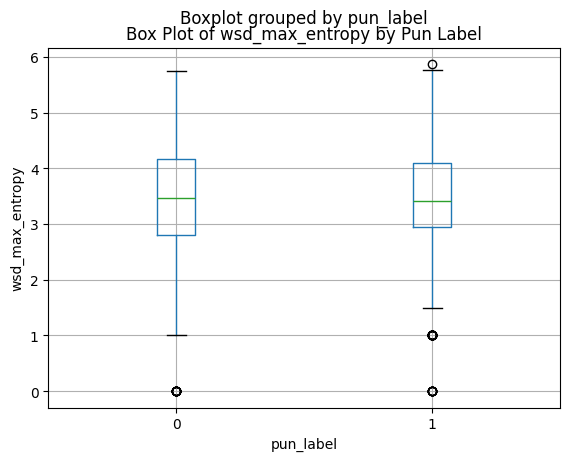

<Figure size 1000x500 with 0 Axes>

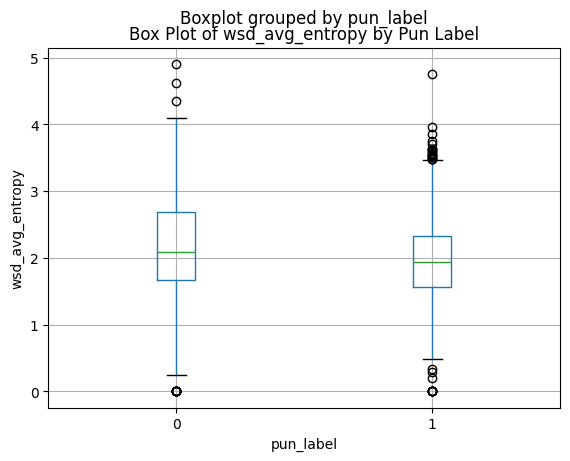

<Figure size 1000x500 with 0 Axes>

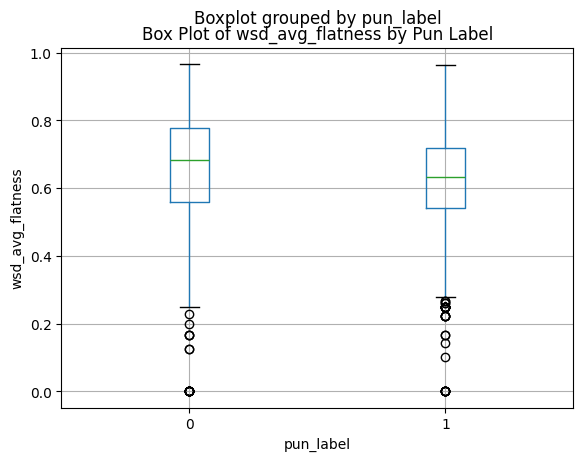

<Figure size 1000x500 with 0 Axes>

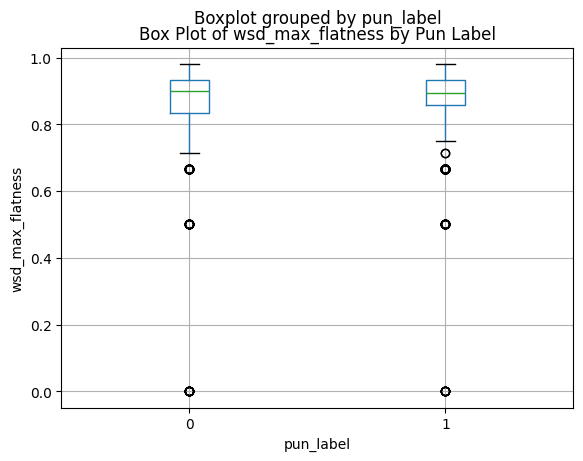

In [26]:
# box plots for each WSD feature by pun label
features = ['wsd_max_entropy', 'wsd_avg_entropy', 'wsd_avg_flatness', 'wsd_max_flatness']
for feature in features:
    plt.figure(figsize=(10, 5))
    stat_train_df.boxplot(column=feature, by='pun_label')
    plt.title(f'Box Plot of {feature} by Pun Label')
    plt.ylabel(feature)
    plt.show()

Just to be sure it is a good idea to test the statistical significance of these features to verify their usefulness as features in the model. The Mann-Whitney U test is a non-parametric test used to compare the distributions of two independent groups (Mann-Whitney U test, 2024). If the distributions are the same for both groups, it is considered a null hypothesis. If they differ between groups, we keep the feature that differs based on if that p-value < 0.05. If it is >= 0.05, drop the feature.

In [27]:
for feature in features:
    group1 = stat_train_df[stat_train_df['pun_label'] == 1][feature]
    group2 = stat_train_df[stat_train_df['pun_label'] == 0][feature]
    u_stat, p_value_u = mannwhitneyu(group1, group2)
    print(f"Mann-Whitney U test for {feature}: U-stat={u_stat}, P-value={p_value_u}")

Mann-Whitney U test for wsd_max_entropy: U-stat=685878.0, P-value=0.7013843217793339
Mann-Whitney U test for wsd_avg_entropy: U-stat=574723.5, P-value=9.334210862692076e-10
Mann-Whitney U test for wsd_avg_flatness: U-stat=564298.0, P-value=1.6920188838098395e-11
Mann-Whitney U test for wsd_max_flatness: U-stat=673440.5, P-value=0.7300749523413732


From these results and statistical significance measures with this method, the average entropy and average flatness are the most effective features for indicating pun disambiguation, as the p values suggest stronger difference in how word senses are distributed. 

In [28]:
stat_train_df.drop(['wsd_max_entropy', 'wsd_max_flatness'], axis=1, inplace=True)

In [29]:
#test set features for eval
stat_test_df[['wsd_max_entropy', 'wsd_avg_entropy', 'wsd_avg_flatness', 'wsd_max_flatness']] = \
    stat_test_df['lemmatized_tokens'].apply(lambda x: pd.Series(get_wsd_features(x)))
wsd_array_test = stat_test_df[['wsd_avg_entropy', 'wsd_avg_flatness']].to_numpy()

In [30]:
stat_val_df[['wsd_max_entropy', 'wsd_avg_entropy', 'wsd_avg_flatness', 'wsd_max_flatness']] = \
    stat_val_df['lemmatized_tokens'].apply(lambda x: pd.Series(get_wsd_features(x)))
wsd_array_val = stat_val_df[['wsd_avg_entropy', 'wsd_avg_flatness']].to_numpy()

##### Feature 6: Polysemy Count

Polysemy is the actual phenomenon where a single word has multiple meanings or senses (Salvatore Attardo, 1994). Counting this for each word gives the number of distinct senses that the word has in WordNet. Puns have been shown to exploit words with high polysemy by intentionally playing on their multiple meanings, so with this we can capture quantifiable semantic ambiguity and compliment the WSD features that focus more on contextual ambiguity than intrinsic ambiguity (Salvatore Attardo, 1994). 

As with WSD, using the lemmatized tokens works better as WordNet organizes words based on lemmas. Without lemmatization however, morphological variants (e.g. plural forms, past tense) might potentially inflate or skew polysemy. 

In [31]:
def polysemy_count(words):
    polysemy_counts = [len(wn.synsets(word)) for word in words] #get num possible senses for each word
    #count words with more than one sense
    total_polysemy = sum(polysemy_counts)
    return total_polysemy

In [32]:
#add polysemy features to the training dataset
stat_train_df[['polysemy_total']] = stat_train_df['lemmatized_tokens'].apply(
    lambda x: pd.Series(polysemy_count(x))
)

In [33]:
#eval test features
stat_test_df['polysemy_total'] = stat_test_df['lemmatized_tokens'].apply(polysemy_count)
polysemy_test = stat_test_df[['polysemy_total']].to_numpy()

In [34]:
stat_val_df['polysemy_total'] = stat_val_df['lemmatized_tokens'].apply(polysemy_count)
polysemy_val = stat_val_df[['polysemy_total']].to_numpy()

##### Combining Features

Logistic regression expects a single 2D feature matrix, so we need to combine the features. They're all on very different basis, so we need to standardize them.

Each feature has a distinct shape we have to keep in mind before combining them...
1. **TF-IDF** -> `tfidf_matrix` -- [num_samples, ~1000]
2. **Doc2Vec** -> `doc2vec_features` -- [num_samples, 50]
3. **POS** -> pos_features_train -- [num_samples, <=500]
4. **Dependencies** -> dep_features_df -- [num_samples, 4]
5. **WSD/Polysemy** -> 2 WSD features + 1 polysemy count

In [35]:
tfidf_arr = tfidf_matrix.toarray() #shape: (num_samples, 1000)
doc2vec_arr = doc2vec_features #shape: (num_samples, 50)
dep_arr = dep_features.to_numpy() #shape: (num_samples, num_dep_features)
pos_arr = pos_features.toarray() #shape: (num_samples, <=500)
wsd_arr = stat_train_df[['wsd_avg_entropy', 'wsd_avg_flatness']].to_numpy() #shape: (num_samples, 2)
polysemy_arr = stat_train_df[['polysemy_total']].to_numpy() #shape: (num_samples, 1)

In [36]:
#combine horizontally
combined_features = np.hstack([
    tfidf_arr,
    doc2vec_arr,
    dep_arr,
    pos_arr,
    wsd_arr,
    #polysemy_arr
])

In [37]:
combined_test_features = np.hstack([
    test_tfidf,
    test_doc2vec_features,
    dep_features_test,
    pos_features_test,
    wsd_array_test,
    #polysemy_test
])

In [38]:
combined_val_features = np.hstack([
    val_tfidf_matrix,
    val_doc2vec_features,
    dep_features_val,
    pos_features_val,
    wsd_array_val,
    #polysemy_val
])

#### Dimensionality Reduction with PCA

This kind of high-dimensional data can result in overfitting, more parameters = harder to generalize. Principal Component Analysis (PCA) works well for dense features such as these, where we can retain the dimensions that explain 95% of the variance while still removing redundancies where they exist. The goal of this would be to improve generalization of the model getting confused.

In [39]:
pca = PCA(n_components=0.95)  # keep 95% variance
reduced_features = pca.fit_transform(combined_features)

In [40]:
test_reduced_features = pca.transform(combined_test_features) #use same PCA object!

In [41]:
val_reduced_features = pca.transform(combined_val_features) #use same PCA object!

#### Normalization

The difference in numeric ranges can cause a bias in training due to the statistical nature of the model - sensitivity to the scales of input features, which we want to avoid. Regularization (L1 and L2) in logistic regression penalizes large coefficients, and if some features have larger scales, they will have inherently larger coefficients automatically. Normalization here would make sure that all features are contributing equally to the optimization process.

I'll use the StandardScaler from sklearn, which standardizes by removing the mean and scaling them to unit variance - aka z-score normalization (Scikit-learn developers.). Distribution is important for these features, and this method keeps the distribution intact (unlike MinMaxScaler which squashes the range to [0,1]).

In [42]:
scaler = StandardScaler() #initialize the scaler
final_features = scaler.fit_transform(reduced_features)

In [43]:
#use same scaler for eval scaling, just transform
X_test_final = scaler.transform(test_reduced_features)

In [44]:
X_val_final = scaler.transform(val_reduced_features)

Note that I'm only doing fit_transform on this training set. I'll do scaler.transform for the test set, using the same scaler learned from training.

#### 2.1.3 Embedding Model-Specific Preprocessing


*Note on Dependencies: Due to struggles with installing simplet5 in the enviornment for this project, the model and very specific versions of dependencies had to be isolated in their own enviornment - specifically gensim's numpy version requirement. Requirements.txt for both enviornments will be included for clarity.*

Preprocessing the pun data to be used with the SimpleT5 embedding model implies aligning the data with the model's i/o format. SimpleT5 is a version of T5 Text-To-Text Transfer Transformer which treats all natural language tasks as text-to-text tasks, in this case converting the problem to a sequence-to-sequence task where the input follows a prompt shape, and the output acts as a label that indicates whether the sentence contains a pun or note.

In [9]:
#load in a copy of test, training, and validation data
embed_train_df = pd.read_csv('training_data.csv')
embed_test_df = pd.read_csv('test_data.csv')
embed_val_df = pd.read_csv('validation_data.csv')

#apply basic pre-processing - only need to clean up structure
embed_train_df['sentence'] = embed_train_df['raw_sentence'].apply(fix_quotation_marks) #fixing spaces between contractions and quotations
embed_test_df['sentence'] = embed_test_df['raw_sentence'].apply(fix_quotation_marks)
embed_val_df['sentence'] = embed_val_df['raw_sentence'].apply(fix_quotation_marks)

Since T5 is a text-to-text model, transform the binary pun_label into "pun" or "not pun" strings to use in the "prompt" to the model.

In [10]:
embed_train_df["label_text"] = embed_train_df["pun_label"].map({1: "pun", 0: "not pun"})
embed_test_df["label_text"] = embed_test_df["pun_label"].map({1: "pun", 0: "not pun"})
embed_val_df["label_text"] = embed_val_df["pun_label"].map({1: "pun", 0: "not pun"})

Very basic prompt engineering for this task implies the input following the "request" shape, and the output the "validation" shape.
- **input:** e.g. "pun detection: this sentence might contain a pun" 
- **target:** "pun" or "not pun"

In [11]:
embed_train_df["input_text"] = "pun detection: " + embed_train_df["sentence"]
embed_train_df["target_text"] = embed_train_df["label_text"]

embed_test_df["input_text"] = "pun detection: " + embed_test_df["sentence"]
embed_test_df["target_text"] = embed_test_df["label_text"]

embed_val_df["input_text"] = "pun detection: " + embed_val_df["sentence"]
embed_val_df["target_text"] = embed_val_df["label_text"]

SimpleT5 expects a specific dataframe shape with the column names source_text and target_text as input to the model.

In [12]:
embed_train_df = embed_train_df[["input_text", "target_text"]].copy()
embed_train_df.rename(columns={"source_text": "source_text"}, inplace=True)

embed_test_df = embed_test_df[["input_text", "target_text"]].copy()
embed_test_df.rename(columns={"input_text": "source_text"}, inplace=True)

embed_val_df = embed_val_df[["input_text", "target_text"]].copy()
embed_val_df.rename(columns={"input_text": "source_text"}, inplace=True)

### 2.2 Baseline 

#### Multinomial Naive Bayes

Before conducting the literature review for this project, there was an initial idea to use Multinomial Naive Bayes as the statistical model, since it is such a common and effective model to use for text classification tasks. The CLEF 2023 JOKER Task mentioned evaluated MNB as one of the models to test more broadly multilingual pun detection, location, and interpretation (Prnjak A. et al., 2023). It ranked third among other models tested for detection of puns, but was found to fall short in its ability to capture the subtlety and ambiguity of puns as context was more difficult to introduce (Prnjak A., et al., 2023). MNB works well because of its ability to handle discrete data and calculate probability distributions, which suits capturing linguistic patterns. 

MNB is definitely competitive, and has served as a baseline for more complicated specialized embedding approaches, and hybrid or extended MNB implementations (Prnjak A., et al., 2023). In the context of the goal of this project - comparing traditional statistic approaches and embedding-based approaches - having MNB as a baseline clarifies where more tuned methods truly add value. Naive Bayes is one of those classic baselines in text classification research (spam filtering is a pretty famous example), so it's a proven meaningful lower-bound for such a specialized and nuanced text classification task as this one. 

If my more advanced approach can't outperform, it would suggest that the approach isn't capturing the essential patterns in the pun data better than basic word-frequency signals. If it does outperform, it becomes evidence that advanced features and/or learned embeddings have more predictive power. 

Both MNB and Logistic Regression are considered traditional classifiers. Logistic Regression tends to handle correlated features a bit better and can more seamlessly incorporate numeric features with different baselines. The bag-of-words assumption of MNB that treats features as independent is what I hypothesize as the greatest limiting factor of MNB for subjective interpretation-based tasks. If my logistic regression model outperforms this baseline, it implies syntactic/semantic feature engineering is capturing patterns beyond simple counts. T5 is a deep, transformer-based model that learns the contextual representations of words. Comparing to this baseline would show how the importance of context interpretation in this task.

In [52]:
#load the datasets
mnb_train_df = pd.read_csv('training_data.csv')
mnb_val_df = pd.read_csv('validation_data.csv')
mnb_test_df = pd.read_csv('test_data.csv')

#preprocess - clean the sentence and make it lowercase
mnb_train_df["sentence"] = mnb_train_df["raw_sentence"].apply(fix_quotation_marks)
mnb_test_df["sentence"] = mnb_test_df["raw_sentence"].apply(fix_quotation_marks)
mnb_val_df["sentence"] = mnb_val_df["raw_sentence"].apply(fix_quotation_marks)

mnb_train_df["sentence"] = mnb_train_df["sentence"].str.lower()
mnb_test_df["sentence"] = mnb_test_df["sentence"].str.lower()
mnb_val_df["sentence"] = mnb_val_df["sentence"].str.lower()

To vectorize with TF-IDF, I select basic feature parameters...
- Including unigrams and bigrams which can be helpful
- limiting feature dimensionality
- and optionally specifying stop words

Not specified any hyperparameters here, though there could be variation of the smoothing parameter (`alpha`).

In [53]:
# fit TF-IDF vectorizer on the training set
vectorizer = TfidfVectorizer(max_features=1000)  # limit features to top 1000
X_train = vectorizer.fit_transform(mnb_train_df["sentence"])
X_val = vectorizer.transform(mnb_val_df["sentence"])
X_test = vectorizer.transform(mnb_test_df["sentence"])

In [54]:
#extract labels
y_train = mnb_train_df["pun_label"].values
y_val = mnb_val_df["pun_label"].values
y_test = mnb_test_df["pun_label"].values

In [56]:
#train model on x and y
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)

MultinomialNB()

In [57]:
#evaluation - predict on test data
y_test_pred = mnb_model.predict(X_test)

acc  = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred, average='binary')
rec  = recall_score(y_test, y_test_pred, average='binary')
f1   = f1_score(y_test, y_test_pred, average='binary')

print("MNB Baseline Test Results:")
print(f"Accuracy = {acc:.3f}")
print(f"Precision = {prec:.3f}")
print(f"Recall = {rec:.3f}")
print(f"F1 = {f1:.3f}")

MNB Baseline Test Results:
Accuracy = 0.785
Precision = 0.781
Recall = 0.972
F1 = 0.866


In [58]:
mnb_metrics = {
    "model": "Multinomial Naive Bayes",
    "accuracy": acc,
    "precision": prec,
    "recall": rec,
    "f1": f1
}

### 2.3 Comparative Classification

#### Statistical Model: Logistic Regression using Feature Engineering

Logistic regression is a linear classifier, where the training process works to minimize the binary cross-entropy loss. The sklearn LogisticRegression model is well documented, and used here for consistency with other libraries, and its coupling with other tools used here that abstract a lot of the process and enable smooth metric measurement.

The model input is the processed feature matrix, including the semantic features, syntactic features, and ambiguity metrics that have been pre-processed, normalized for a uniform scale, and compressed using dimensionality reduction. 

In [45]:
X_train = final_features  #processed feature matrix
y_train = stat_train_df['pun_label'].values

The model includes L1 regularization, which penalizes larger weights. Lasso (L1) encourages sparsity in the weights, which can help pick out the less relevant features. Max iterations controls the number of optimization steps - for now 1000 works to start. 

K-Fold Cross-Validation splits the training data into k equally sized subsets (folds) (Scikit-learn developers.). The model is trained on k - 1 folds, and validated on the remaining one, repeated k times to ensure every fold is used for validation exactly once. It ensures the model is tested on a diverse enough subset of the data, so things won't get left out or overlooked in what might otherwise be something too rigid for pun detection. In the optimization process we can observe the average validation performance and tine-tune hyperparameters like C and some PCA components.

In [46]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

In [47]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary')
}

In [48]:
cv_results = cross_validate(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring=scoring,
    return_train_score=True
)

In [49]:
print("Cross-Validation Results:")
print(f"  Accuracy (val): {np.mean(cv_results['test_accuracy']):.3f}")
print(f"  Precision (val): {np.mean(cv_results['test_precision']):.3f}")
print(f"  Recall (val): {np.mean(cv_results['test_recall']):.3f}")
print(f"  F1 (val): {np.mean(cv_results['test_f1']):.3f}")

Cross-Validation Results:
  Accuracy (val): 0.834
  Precision (val): 0.875
  Recall (val): 0.896
  F1 (val): 0.885


After this first pass we can see against the metrics that the model correctly classifies 71.4% of sentences as containing a pun or not, possibly predicting too many false positives. About 28.6% of sentences predicted as puns were false positives - not actually puns, so we need to understand why the model might be overpredicting puns. The model did a good job detecting all true puns, with perfect recall, and a relatively high F1 score indicating a reasonable enough trade-off between precision and recall.

From here we can address various areas of improvement shown by the metrics by doing a few things such as refining features, or regularization tuning. Techniques such as Recursive Feature Elimination (RFE) help identify the most useful features which can reduce some of the noise causing bad precision. Adjusting the regularization strength (C) in the logistic regression model to be a bit lower applies stronger regularization and overfitting reduction. 

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(
    LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000),
    param_grid,
    scoring='f1',
    cv=5
)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 0.1}


Using sklearn's GridSearchCV to find the optimal regularization parameter resulted in the idea that the model could benefit from stronger regularization. With this, retraining the model on the entire training set using the new C value, then evaluating with the validation set will confirm the potential improvements in metrics.

In [51]:
#retrain
final_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, C=0.1)
final_model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear')

In [52]:
#target labels from validation
y_val = stat_val_df['pun_label'].values

In [53]:
#evaluate on validation set
y_val_pred = final_model.predict(X_val_final)
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f"Validation Accuracy:  {accuracy:.3f}")
print(f"Validation Precision: {precision:.3f}")
print(f"Validation Recall:    {recall:.3f}")
print(f"Validation F1 Score:  {f1:.3f}")

Validation Accuracy:  0.828
Validation Precision: 0.859
Validation Recall:    0.909
Validation F1 Score:  0.883


To evaluate after optimization, we retrain the logistic regression on all folds, then apply the same transformations we did on training data to the test set features, and evaluate final metrics on the test data. 

In [54]:
y_test = stat_test_df['pun_label'].values
y_pred_test = final_model.predict(X_test_final)

# final metrics for logistic regression
lr_metrics = {
    "model": "Logistic Regression",
    "accuracy": accuracy_score(y_test, y_pred_test),
    "precision": precision_score(y_test, y_pred_test),
    "recall": recall_score(y_test, y_pred_test),
    "f1": f1_score(y_test, y_pred_test)
}

From a few iterations of evaluating scores and modifying the model and features, it was concluded that removing the counts of polysemy instances was significantly skewing the model to overinterpret and spike false positives. This could be due to the fact words, when looked up in the synset WordNet collection, were being identified for meanings that were not actually inherent to the context as they should be. Tuning of this feature would be required, which is out of the scope of this assessment, but it would make sense to look at a presence indicator, rather than a count. Note that the SemEval dataset used for this project contains sentences with only one (or no) instance of a pun each, and this occurs in an adjective, major verb, or noun (Miller, T. et al. 2017). Counting any more than this is what is most likely producing the decreased performance. 

In [55]:
print(f"Validation Accuracy:  {lr_metrics['accuracy']:.3f}")
print(f"Validation Precision: {lr_metrics['precision']:.3f}")
print(f"Validation Recall:    {lr_metrics['recall']:.3f}")
print(f"Validation F1 Score:  {lr_metrics['f1']:.3f}")

Validation Accuracy:  0.826
Validation Precision: 0.856
Validation Recall:    0.910
Validation F1 Score:  0.882


#### Embedding-Based Model: SimpleT5

To compare against an Embedding-Based model we use SimpleT5, which is a Huggingface T5 wrapper that keeps the full scope of the model, but abstracts most of the complexity involved in training T5. I don't have access to a GPU, so most of the power of fine-tuning my T5 model with granular function definitions will not see as much benefit. Using this abstraction is enough to show the scope of capabilities for each model, without focusing too much on code specific optimization. 

In the CLEF workshop JokeR that focused on a humor detection and translation task, SimpleT5 was evaluated against other transformer models and was found the most optimal and representitive of the embedding-based aproach's ability to contextualize (Gepalova, A. et al., 2024). 

In [1]:
from simplet5 import SimpleT5

Global seed set to 42


SimpleT5 is a Transformer-based text-to-text model. It leverages T5's pre-trained embeddings, which capture deep contextual information in text. It captures nuances of text, including hierarchical and sequential relationships that contribute to its broad context understanding. Because it relies on embeddings over handcrafted features, virtually no feature engineering is required to capture deep and complicated relationships. It's also scalable, and can be fine-tuned on new tasks broader than simple pun disambiguation classification in text.

Computational cost is the significant downside of embedding models such as this one. Another less obvious drawback is the lack of interpretability for its predictions, we can't exactly know why the model says what it does. In theory, as long as results are good interpretability shouldn't matter. However, it can be crucial in assurance scenarios, and a valuble thing to understand when using a model for tasks such as these that greatly hinge on human meaning, understnaidng, and interpretation. 

Elect to use the t5-small pretrained model for this scope, though in future development, it might be worth exploring t5-base or t5-large.

In [47]:
model = SimpleT5()
model.from_pretrained(model_type="t5", model_name="t5-small")

/opt/anaconda3/envs/nlp_env/lib/python3.10/site-packages/transformers/modeling_utils.py:1435: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(resolved_

I specify these training hyperparameters to set the space for the training task...

`source_max_token_len` - Maximum token length for input. I'll set this based on the overall sentence length, but I will take truncation into account.

`target_max_token_len` - Maximum token length for output. We're expecting a binary "pun" or "no pun", but I will set it to **10** to be safe.

`batch_size` - Defines how many samples are processed per whatever processor I have during training in each forward/backward pass. I don't have access to a GPU for training, so the smaller batch size can reduce memory use.

`max_epochs` - Specifies the number of times the entire training set is passed through the model. For now I set it to **3** epochs only since this is only a binary classification task and I want to avoid overfitting. The dataset is pretty small and pre-trained models like this tend to converge quickly, so I can increase this value as needed (Almeida, F. et al. 2021).

`use_gpu` - I don't have a CUDA-enabled computer so this will be set to **False**. 

In [48]:
model.train(
    train_df=train_df,
    eval_df=val_df,
    source_max_token_len=128,
    target_max_token_len=10,
    batch_size=8,
    max_epochs=3,
    use_gpu=False
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 60.5 M
-----------------------------------------------------
60.5 M    Trainable params
0         Non-trainable params
60.5 M    Total params
242.026   Total estimated model params size (MB)


Validation sanity check:   0%|          | 0/2 [00:00<?, ?it/s]

/opt/anaconda3/envs/nlp_env/lib/python3.10/site-packages/pytorch_lightning/trainer/data_loading.py:132: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
Global seed set to 42
Global seed set to 42


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
                                                                      

Global seed set to 42
/opt/anaconda3/envs/nlp_env/lib/python3.10/site-packages/pytorch_lightning/trainer/data_loading.py:132: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 0:   0%|          | 0/504 [00:00<?, ?it/s] 

Global seed set to 42
Global seed set to 42


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Epoch 0:  80%|████████  | 405/504 [06:24<01:34,  1.05it/s, loss=0.268, v_num=3, train_loss_step=0.163] 

Global seed set to 42
Global seed set to 42


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Epoch 1:   0%|          | 0/504 [00:00<?, ?it/s, loss=0.272, v_num=3, train_loss_step=0.187, val_loss_step=0.107, val_loss_epoch=0.151, train_loss_epoch=0.469]          

Global seed set to 42
Global seed set to 42


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Epoch 1:  80%|████████  | 405/504 [06:29<01:35,  1.04it/s, loss=0.182, v_num=3, train_loss_step=0.254, val_loss_step=0.107, val_loss_epoch=0.151, train_loss_epoch=0.469]  

Global seed set to 42
Global seed set to 42


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Epoch 2:   0%|          | 0/504 [00:00<?, ?it/s, loss=0.203, v_num=3, train_loss_step=0.0787, val_loss_step=0.0417, val_loss_epoch=0.117, train_loss_epoch=0.175]          

Global seed set to 42
Global seed set to 42


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Epoch 2:  80%|████████  | 405/504 [05:37<01:22,  1.20it/s, loss=0.133, v_num=3, train_loss_step=0.178, val_loss_step=0.0417, val_loss_epoch=0.117, train_loss_epoch=0.175]  

Global seed set to 42
Global seed set to 42


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Epoch 2: 100%|██████████| 504/504 [06:09<00:00,  1.36it/s, loss=0.128, v_num=3, train_loss_step=0.0703, val_loss_step=0.110, val_loss_epoch=0.111, train_loss_epoch=0.129]


During training, SimpleT5 logs loss and validation metrics after each epoch. Note that SimpleT5 primarily logs loss values. Eventually when the experiment might move to more granular finetuning with a model such as T5ForConditionalGeneration, we can specify the evaluation function step with more control over hyperparameters.

Models developed from each epoch will be stored in a new directory outputs created during training. The trainer automatically will save the best models during training by a metric, in this case loss.

As we can see, the specific model used here is the T5ForConditionalGeneration model. The architecture of this model in particularly leverages the transformer model's ability to capture long-range dependencies in text. While not exactly applicable here, this indirectly effects the models attention mechanism that weighs the significance of different parts of a sentence, facilitating classification across a greater dependency distance. This is similar to something we attempt to capture as a dependency feature in the logistic regression model.

In [2]:
model = SimpleT5() #to use ad hoc
model.load_model("t5", "outputs/simplet5-epoch-2-train-loss-0.129-val-loss-0.1111", use_gpu=False)

/opt/anaconda3/envs/nlp_env/lib/python3.10/site-packages/transformers/modeling_utils.py:1435: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(resolved_

From here using the model to generate some predictions by loading the validation data and testing it on the trained model, allows final metric computation. In this method, `predictions` is a list of strings, either "pun" or "not pun" assuming the model learned well.

In [13]:
test_sentences = embed_test_df['source_text'].tolist()
predictions = []
for sentence in test_sentences:
    pred = model.predict(sentence)  # model returns a list of predictions
    predictions.append(pred[0])  # extract the first (and only) prediction

Finally using these predictions, map the string values back to their binary, "pun" -> 1 , "not pun" -> 0 to compare with ground truth labels.

In [14]:
predicted_labels_test = [1 if pred.strip().lower() == "pun" else 0 for pred in predictions]
true_labels_test = [1 if validation.strip().lower() == "pun" else 0 for validation in embed_test_df['target_text']]

In [15]:
#calculating test accuracy with accuracy score
acc_test = accuracy_score(true_labels_test, predicted_labels_test)
prec_test = precision_score(true_labels_test, predicted_labels_test)
rec_test = recall_score(true_labels_test, predicted_labels_test)
f1_test = f1_score(true_labels_test, predicted_labels_test)

# display the results
print("SimpleT5 Model Performance on Test Set:")
print(f"Accuracy:  {acc_test:.3f}")
print(f"Precision: {prec_test:.3f}")
print(f"Recall:    {rec_test:.3f}")
print(f"F1 Score:  {f1_test:.3f}")

SimpleT5 Model Performance on Test Set:
Accuracy:  0.900
Precision: 0.922
Recall:    0.939
F1 Score:  0.930


In [16]:
simplet5_metrics = {
    "model": "SimpleT5",
    "accuracy": acc_test,
    "precision": prec_test,
    "recall": rec_test,
    "f1": f1_test
}

## III. Conclusions

In [57]:
results = pd.read_csv('results.csv') #load from saved final results
results.head()

,model,accuracy,precision,recall,f1
0,Logistic Regression,0.826303,0.856209,0.909722,0.882155
1,Multinomial Naive Bayes,0.785360,0.781032,0.972222,0.866203
2,SimpleT5,0.899504,0.921635,0.939236,0.930353


SimpleT5 excels across all metrics, with the highest overall accuracy and an F1 score of around 93%. 

All models have pretty strong recall metrics. Logistic Regression achieved perfect recall (100%) which indicates it successfully identified all puns in the test set, but at the cost of lower precision. Multinominal Naive Bayes and SimpleT5 also show strong recall that balance with precision a little better. 

The precision gap between Logistic Regression model and the SimpleT5 model notes the significant false-positive rate in the logistic regression's predictions.

### 3.1 Performance Analysis & Comparison

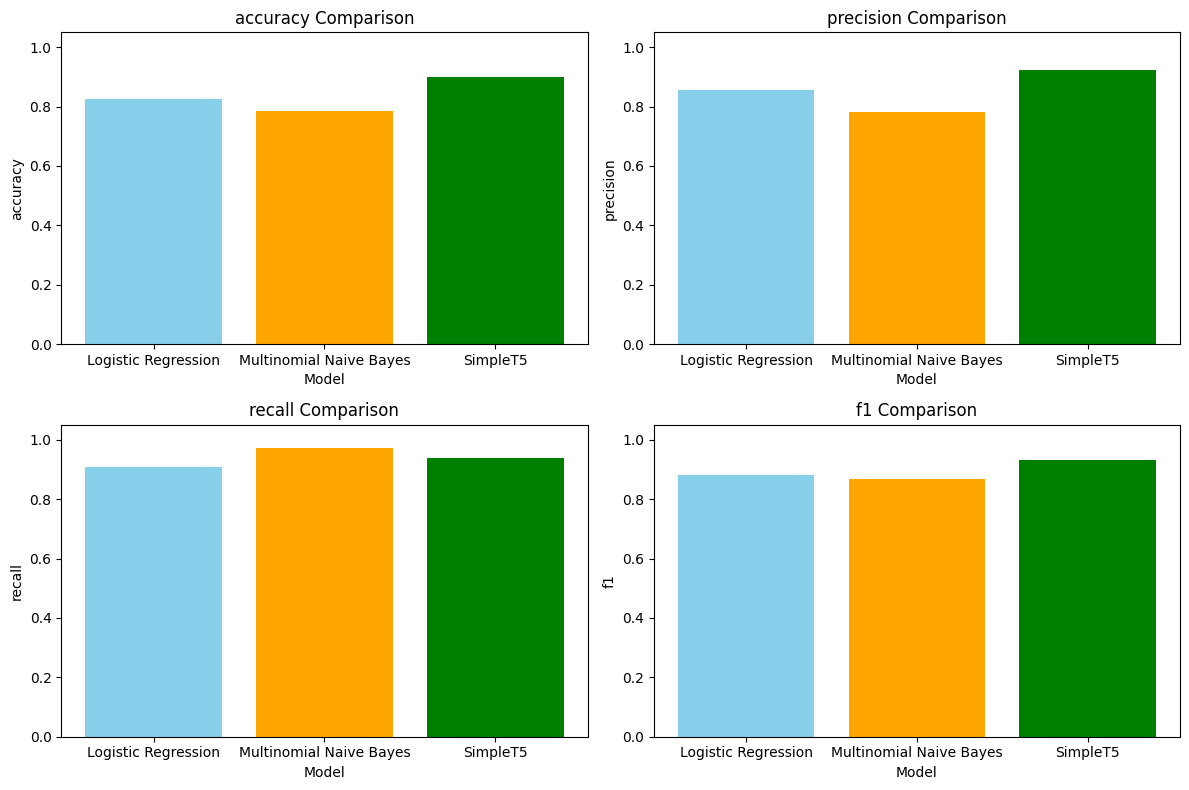

In [58]:
#graph performance metrics 
metrics = ['accuracy', 'precision', 'recall', 'f1']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 grid
axes = axes.flatten()
for i, metric in enumerate(metrics):
    axes[i].bar(results['model'], results[metric], color=['skyblue', 'orange', 'green'])
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylim(0, 1.05)
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Model')
plt.tight_layout()
plt.show()

`Logistic Regression`

With a pretty strong recall and high precision, the F1 remains pretty balanced for this model, suggesting that the model didn't just blindly overpredict puns and might actually benefit from effective feature engineering. Handcrafted features likely emphasized ambiguity and wordplay cues, enabling the model to detect puns more effectively. The decision boundary however seems to have failed at least a little to capture non-linear interactions or deeper contextual nuances.

`Multinomial Naive Bayes - Baseline` 

The bag of words foundation of this model may have benefitted from the pun-specific words or n-grams which inflated the statistical significance and pattern recognition in the text, but didn't entirely capture deeper context or semantic nuances. Pun-related words and recurring n-grams probably boosted recall, but the absence of deeper semantic understanding led to false positives and limited precision. 

`SimpleT5` 

Clearly dominates all metrics, indicating its contexxtual embeddings can resolve ambiguities - e.g. homo and heterographic puns. It required however, significantly more computational resources to fine-tune and deploy compared to the lighter weight statistical approaches, and it was less obvious exactly what it missed and why. 

The statistical logistic regression model offered interpretability where coefficients directly impact feature importance, and the emphasis placed on encapsulating the challenges presented in the task proved was effective. The linear assumption that constrains models like this tend to consistently fail to capture intricate linguistic patterns or context-based pun structures, and performance ends up hinging on the comprehensive feature design. From research and the results of this experiment, it seems that this approach consistently hits the upper bound of the lowest class, tending to be outperformed by deeper architectures on tasks such as these.

The baseline Multinomial Naive Bayes model did an effective job showcasing the strengths of statistical approaches and where they fall short with subjective text interpretation tasks. The statistical assumptions inherent to this implementation ignores inter-dependencies and context that will consistently have a negative effect on disproportionate false positive. 

The SimpleT5 embedding model captures semantic subtleties and polysemy inherent to puns and consistently learns relevant features end-to-end without needing to tweak much or give it any sort of "interpretation" ability, as you would have to with statistical models. It has the most coverage, with the only downsides being computational power requirements - especially for more granularity - and lack of transparency into exactly why a pun was detected. The embedding model's ability to capture multi-token semantics and extensively context is what helps it handle ambiguous linguistics structures more effectively.

Based on the results of this exploration, it would be beneficial to use statistical models for subjective text interpretation tasks when the data to work with is small, which is pretty common for humor or disambiguation datasets. Being able to interpret exactly which linguistic cues signal a pun offers a unique strength, and can offer a new way to understand the effects of linguistic features on how humor (or more broadly, meaning) is expressed textually. 

The rich context and ability to capture subtlety of the embedding model approach by virtue of deeper representation learning is why, for highly contextual or complex pun/subjective word useage, embedding models will most likely outperform by default, and with GPU availibility, offer extremely competitive accuracies. 

### 3.2 Summary & Reflection

This exploration investigated the use of a logistic regression model that represented an optimized statistical approach, and a SimpleT5 embedding-based model approach for pun detection - a task that inherently requires some sort of handling of linguistic ambiguity. The Multinomial Naive Bayes model sserved as a baseline, offering quick and straightforward bag-of-words perspective, representitive of the general strengths of even very basic statistical models. Each model was evaluated on a prepared dataset (SemEval 2017 Task 7) that featured the dimensions of complexities of puns, including homo and heterographic puns, exposing both models to semantic and phonetic ambiguities. 

The Logistic Regression approach tested demonstrated that well-engineered features that capture as much perspective as possible can achieve a respectable and competitive balance between precision and recall. The limitations its linear assumptions and reliance on manual feature crafting limit both capacity and ability to scale to capture more complex situations. SimpleT5 contrasts this - while requiring greater time and computaitonal resources - excelling in all performance metrics.

From a practical standpoint, traditional statistical models are attractive for smaller-scale scenarios where interpretability matters and resource constraints might effect the quality of embedding-model predictions. Embedding-based models do great in complex text spaces where higher accuracy and robust context understanding outweigh whatever interpretability or verification concerns that might arise. The work done in this report contributes to the broader domain of subjective text classification by practically exploring how pun-detection can serve as a benchmark for understanding a model or model approach's ability to handle ambiguity and subtlety. 

This project sets up for an interesting research space and presents the idea of the extent we can use statistical approaches that quantify the subjective qualities of text to allow for recognition of new patterns for analysis, to enhance and even go as far as interpret results of embedding-based neural models. The framework established sets up for this and extension into related text classification tasks such as sarcasm detection or metaphor processing. The core methodology, balancing interpretability, resources, and performance, is transferrable to other problems within this domain, and even other domain-specific areas that could be used as context to explore and be supported by subjective of creative language pattern interpretation. 

## IV. References

[1] Salvatore Attardo. 1994. Linguistic Theories of Humor. Mouton de Gruyter.

[2] Popova, O., & Dadic, P. (2023). Does AI Have a Sense of Humor? CLEF 2023 JOKER Tasks 1, 2 and 3: Using BLOOM, GPT, SimpleT5, and More for Pun Detection, Location, Interpretation and Translation. Conference and Labs of the Evaluation Forum.

[3] Gepalova, A., Chifu, A.-G., & Fournier, S. (2024). CLEF 2024 Joker Task 1: Exploring Pun Detection Using The T5 Transformer Model Notebook for the JOKER Lab at CLEF 2024

[4] Miller, T., & Gurevych, I. (n.d.). Automatic disambiguation of English puns. Ubiquitous Knowledge Processing Lab (UKP-TUDA), Department of Computer Science, Technische Universität Darmstadt. https://www.ukp.tu-darmstadt.de/

[5]Miller, T., Hempelmann, C. F., & Gurevych, I. (2017). SemEval-2017 Task 7: Detection and Interpretation of English Puns. In Proceedings of the 11th International Workshop on Semantic Evaluation (SemEval-2017) (pp. 58-68). Association for Computational Linguistics7

[6]Miller, T., & Turković, M. (2016). Towards the automatic detection and identification of English puns. ACM Transactions on Speech and Language Processing, 13(1), 1-30

[7]Prnjak, A., Davari, D. R., & Schmitt, K. (2023). CLEF 2023 JOKER Task 1, 2, 3: Pun Detection, Pun Interpretation, and Pun Translation. In G. Faggioli, N. Ferro, A. Hanbury, & M. Potthast (Eds.), CEUR Workshop Proceedings: Vol. 3497. Working Notes of CLEF 2023 - Conference and Labs of the Evaluation Forum.

[8]Feng, J., Sevgili, Ö., Remus, S., Ruppert, E., & Biemann, C. (2020). Supervised Pun Detection and Location with Feature Engineering and Logistic Regression. In Proceedings of the 5th SwissText & 16th KONVENS Joint Conference. CEUR Workshop Proceedings, 2624.

[9]Rayz, J.T., & Mazlack, L.J. (2004). Computationally Recognizing Wordplay in Jokes.

[10]Dessì, D., Helaoui, R., Kumar, V., Recupero, D. R., & Riboni, D. (n.d.). TF-IDF vs Word Embeddings for Morbidity Identification in Clinical Notes: An Initial Study.

[11]GeeksforGeeks. (2024, June 20). Logistic Regression in Machine Learning. https://www.geeksforgeeks.org/understanding-logistic-regression/

[12]Bird, S., Klein, E., & Loper, E. (n.d.). WordNet Interface. Natural Language Toolkit. Retrieved January 4, 2025, from https://www.nltk.org/howto/wordnet.html

[13]Mann–Whitney U test. (2024). In Wikipedia. Retrieved January 4, 2025, from https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test

[14]Scikit-learn developers. (n.d.). sklearn.preprocessing.StandardScaler. scikit-learn. Retrieved January 4, 2025, from https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.StandardScaler.html

[15]Almeida, F., & Duarte Santos, J. (2021). The role of artificial intelligence in clinical trials: A systematic review. Clinical and Translational Science, 14(5), 1765-1776. https://doi.org/10.1111/cts.13077